In [2]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
import seaborn

In [3]:
seaborn.set()

In [5]:
#data = pd.read_csv('test_df2.csv')
data = pd.read_csv('music_db.csv')
data.head(3)

,user_name,nickname,signature,verified,follower_count,following_count,likes_count,video_count,collabs,hashtags
0,kissamile,kissamile,☀️ Neosoul - Chillhop duo\r\n5K on insta 🚀\r\n...,False,1072,80,7399,182,"['thomasalanng', 'rob1toad', 'dellguistovitch'...","['chillhop', 'chillbeats', 'neosoul', 'lofibea..."
1,conor_albert,Conor Albert,m n James Smith got a new tune out ! Checkkitt...,True,61400,131,601700,121,"['themaxpope', 'jamessmithvocal', 'mayadelilah...","['cover', 'jam', 'vibes', 'jamessmith', 'loop'..."
2,themaxpope,Max Pope,Singing songs 🌝🌚,False,56,5,125,19,['conor_albert'],"['chill', 'rework', 'guitar', 'letsgo', 'chris..."


<AxesSubplot:title={'center':'Repartition verified users'}, ylabel='user_name'>

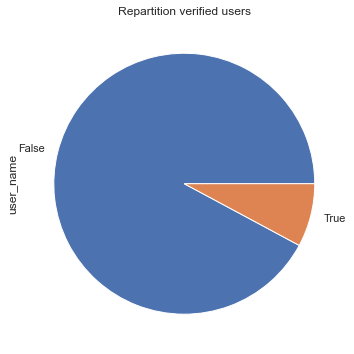

In [6]:
data.groupby(data.verified).count().user_name.plot.pie(title = 'Repartition verified users', figsize=(11, 6))

<AxesSubplot:title={'center':'Distrubituion du nombre de followers par utilisateurs'}, ylabel='Frequency'>

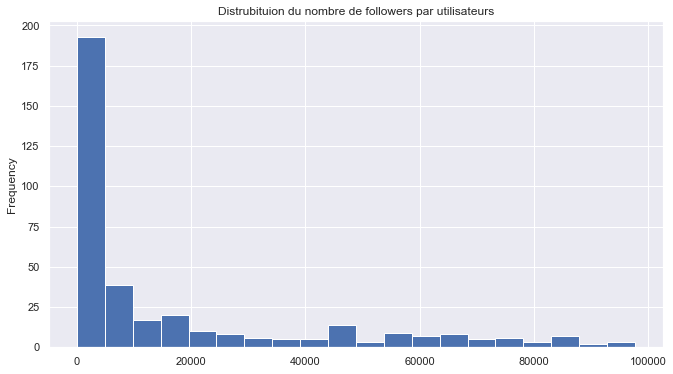

In [10]:
data.follower_count.plot.hist(title = 'Distrubituion du nombre de followers par utilisateurs', figsize=(11, 6), bins=20)

<AxesSubplot:title={'center':'Distrubituion du nombre de followings par utilisateurs'}, ylabel='Frequency'>

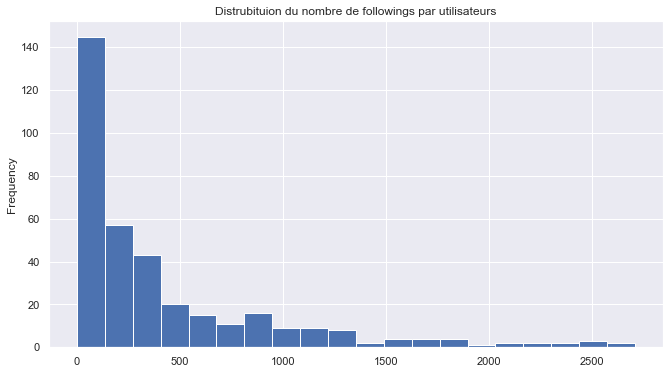

In [11]:
data[data['following_count'] < 3000].following_count.plot.hist(title = 'Distrubituion du nombre de followings par utilisateurs', figsize=(11, 6), bins=20)

<AxesSubplot:title={'center':'Distrubituion du nombre de likes par utilisateurs'}, ylabel='Frequency'>

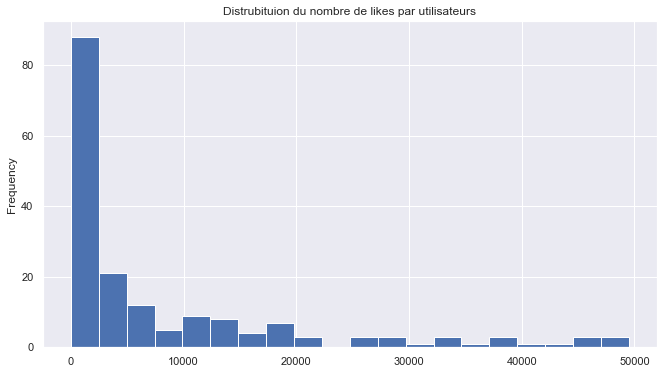

In [13]:
data[data['likes_count'] < 50000].likes_count.plot.hist(title = 'Distrubituion du nombre de likes par utilisateurs', figsize=(11, 6), bins=20)

Text(0.5, 1.0, 'Nombre de collabs')

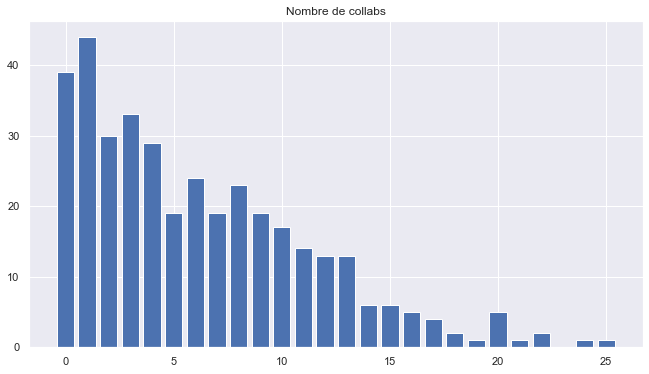

In [15]:
fig, ax = plt.subplots(figsize=(11,6))

H = []
for i in range(len(data)):
    H.append(len(ast.literal_eval(data.collabs[i])))
counter = Counter(H)
res = Counter({k: c for k, c in counter.items()})
plt.bar(res.keys(), res.values())
plt.title('Nombre de collabs')

Text(0.5, 1.0, 'Nombre dutilisation des hashtags les plus fréquents')

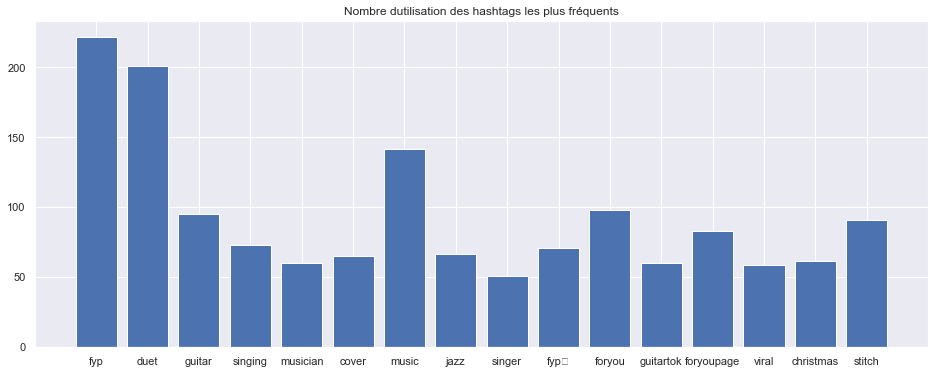

In [19]:
fig, ax = plt.subplots(figsize=(16,6))

H = []
for i in range(len(data)):
    H_line = ast.literal_eval(data.hashtags[i])
    for w in H_line:
         H.append(w)

counter = Counter(H)
res = Counter({k: c for k, c in counter.items() if c > 50})
plt.bar(res.keys(), res.values())
plt.title('Nombre dutilisation des hashtags les plus fréquents')